# WorldWide Billionaires Analysis

**Problem Statement**

Analyze the data of billionaires worldwide to understand how they make their money, their ages, and the industries they're in.

**Data Sources**

Use information from Forbes and other reliable sources to study billionaires' details.

**Work Flow**

1. Data Loading
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis and Visualization
4. Conclusions

In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('C:\STUDY\Data Science\All Data Science Projects\Worlwide Billionaire Analysis\Billionaire.csv')
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [57]:
df.shape

(2755, 7)

In [58]:
df.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


**Data Cleaning and Preprocessing**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


## Checking the Missing Values

In [60]:
missing_values = df.isnull().sum()
missing_values

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [61]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [62]:
missing_value = df.isnull().sum()
missing_value

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Here we have replaced All the missing values in Age column by imputation using central tendency(i.e by using mean)

## Check if there is any duplicate values are there or not


In [63]:
duplicates = df[df.duplicated()]
duplicates

,Name,NetWorth,Country,Source,Rank,Age,Industry


In [64]:
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Here there is no Duplicate Records in our dataset.

In [65]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


## Check if there is any outliers present or not 

Outliers means to check if there is any entry in our dataset that is different from the other entries.Like values in that particular row is very different from values of other rows.

In [66]:
#Calculate the Z score for each column
z_score = np.abs((df-df.mean())/df.std())

threshold = 3

outliers = df[(z_score > threshold).any(axis=1)]

if not outliers.empty:
    print("Outliers found:")
    print(outliers)
else:
    print("No outliers found.")

Outliers found:
                    Name NetWorth  Country      Source  Rank   Age  \
940  Kevin David Lehmann   $3.3 B  Germany  drugstores   925  18.0   

             Industry  
940  Fashion & Retail  


C:\Users\rd\AppData\Local\Temp\ipykernel_17284\394109779.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_score = np.abs((df-df.mean())/df.std())


Here we have found outlier because this person is very young compare to other billionaires so it is showing as an outlier,but according to the research Kevin David Lehmann is a 18 years old billionaire in Fashion and retail Industry.So here we do not have to take any action on this particular record or we do not have to drop this row

**Exploratory Data Analysis**

## Q-1 What is an Average Age of billionaires?

In [67]:
Average_Age = df['Age'].mean()
print("Average Age of Billionaires is : ",Average_Age)

Average Age of Billionaires is :  63.11360239162925


## Q-2 Is there any correlation between Age and Net Worth?

In [68]:
#Here Networth contains non numeric records so first we have to convert it into numeric records in case if we want to find correlation. 

df['NetWorth'] = df['NetWorth'].str.replace('$', '').str.replace('B', '').astype(float)

correlation = df['Age'].corr(df['NetWorth'])
print("Correlation Between Age and Networth is : ",correlation)

Correlation Between Age and Networth is :  0.03369672907126923


C:\Users\rd\AppData\Local\Temp\ipykernel_17284\2020764978.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['NetWorth'] = df['NetWorth'].str.replace('$', '').str.replace('B', '').astype(float)


Correlation is a statistical measure used to quantify the degree to which two variables are related or move together in a consistent way.So Here there is weak correlation between age and Networth,As the value of good correlation varies between -1 to 1 where 1 indicates the perfect positive correlation,-1 indicates the perfect negative correlation and 0 indicates no linear correlation.Here Our value is around 0 so it indicates a very weak or no linear correlation between Age and NetWorth

In [69]:
df.corr()

,NetWorth,Rank,Age
NetWorth,1.000000,-0.475346,0.033697
Rank,-0.475346,1.000000,-0.103257
Age,0.033697,-0.103257,1.000000


## Q-3 Which country has the highest number of billionaires?

In [70]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [71]:
total_country = df['Country'].value_counts()
total_country

United States           724
China                   626
India                   140
Germany                 136
Russia                  118
                       ... 
Venezuela                 1
Eswatini (Swaziland)      1
Algeria                   1
Liechtenstein             1
Nepal                     1
Name: Country, Length: 70, dtype: int64

In [72]:
highest_billionaire_country = total_country.idxmax()
highest_billionaire_count = total_country.max()
print(f"The country with the highest number of billionaires is {highest_billionaire_country} with {highest_billionaire_count} billionaires.")

The country with the highest number of billionaires is United States with 724 billionaires.


## Q-4 Are there differences in the sources of wealth among billionaires from different countries?

ValueError: num must be 1 <= num <= 6, not 7

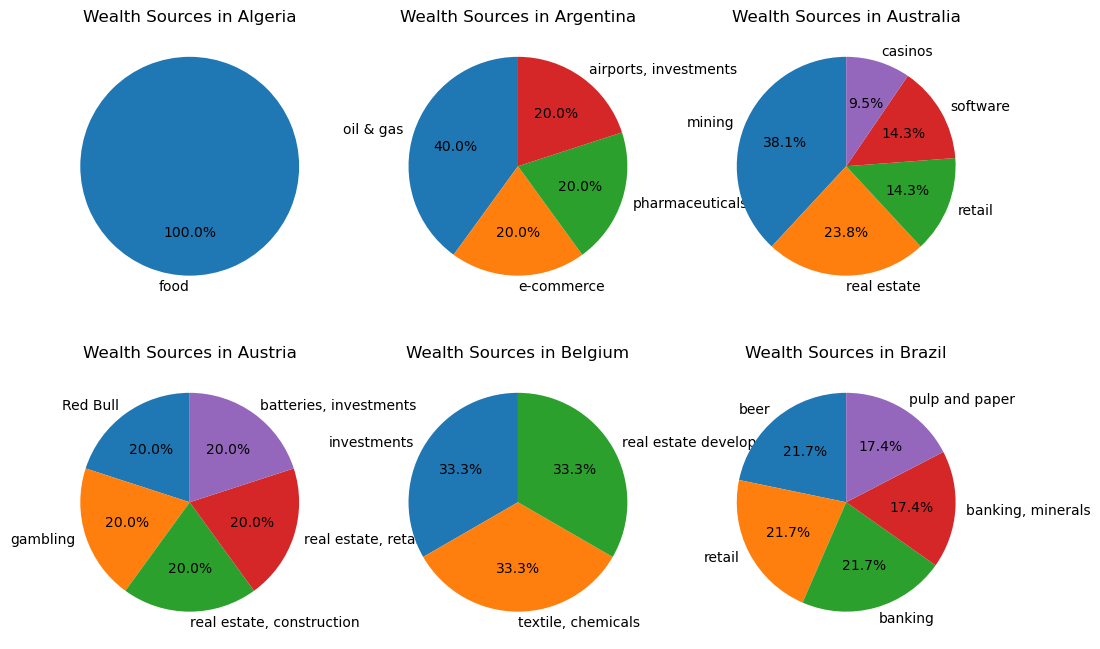

In [73]:
import matplotlib.pyplot as plt

# Group data by country
country_groups = df.groupby('Country')

# Create subplots to visualize sources of wealth by country
plt.figure(figsize=(12, 8))

for country, group_data in country_groups:
    plt.subplot(2, 3, len(plt.gcf().get_axes()) + 1)  # Create a 2x3 grid of subplots
    wealth_sources = group_data['Source'].value_counts().head(5)  # Get the top 5 sources of wealth
    plt.pie(wealth_sources, labels=wealth_sources.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Wealth Sources in {country}')
    
plt.tight_layout()
plt.show()


In [74]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


## Q-5 What are the most common sources of wealth among billionaires in the dataset?

In [75]:
wealth_source_counts = df['Source'].value_counts()

top_wealth_sources = wealth_source_counts.head()
top_wealth_sources

real estate        171
pharmaceuticals     99
investments         90
diversified         85
software            62
Name: Source, dtype: int64

## Q-6 Are there differences in the net worth of billionaires based on their source of wealth? 

In [76]:
import scipy.stats as stats

groups = {}
for source, group_data in df.groupby('Source'):
    groups[source] = group_data['NetWorth']

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(*groups.values())

print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05) to determine significance
if p_value < 0.05:
    print("There are significant differences in net worth based on source of wealth.")
else:
    print("There are no significant differences in net worth based on source of wealth.")

ANOVA F-statistic: 2.7203292636936665
ANOVA p-value: 4.427850417452112e-74
There are significant differences in net worth based on source of wealth.


## Q-7 Who are the top billionaires in terms of rank?

In [77]:
df_sorted = df.sort_values(by='Rank', ascending=True)

top_n = 10
top_billionaires = df_sorted.head(top_n)
top_billionaires[['Rank', 'Name','Age','Source','Industry']]

,Rank,Name,Age,Source,Industry
0,1,Jeff Bezos,57.0,Amazon,Technology
1,2,Elon Musk,49.0,"Tesla, SpaceX",Automotive
2,3,Bernard Arnault & family,72.0,LVMH,Fashion & Retail
3,4,Bill Gates,65.0,Microsoft,Technology
4,5,Mark Zuckerberg,36.0,Facebook,Technology
5,6,Warren Buffett,90.0,Berkshire Hathaway,Finance & Investments
6,7,Larry Ellison,76.0,software,Technology
7,8,Larry Page,48.0,Google,Technology
8,9,Sergey Brin,47.0,Google,Technology
9,10,Mukesh Ambani,63.0,diversified,Diversified


## Q-8 Which industries have the highest concentration of billionaires?

Industries with the Highest Concentration of Billionaires:
Finance & Investments    13.466425
Technology               13.248639
Manufacturing            12.014519
Fashion & Retail          9.909256
Healthcare                8.021779
Food & Beverage           7.949183
Real Estate               7.803993
Diversified               6.823956
Energy                    3.629764
Media & Entertainment     3.448276
Name: Industry, dtype: float64


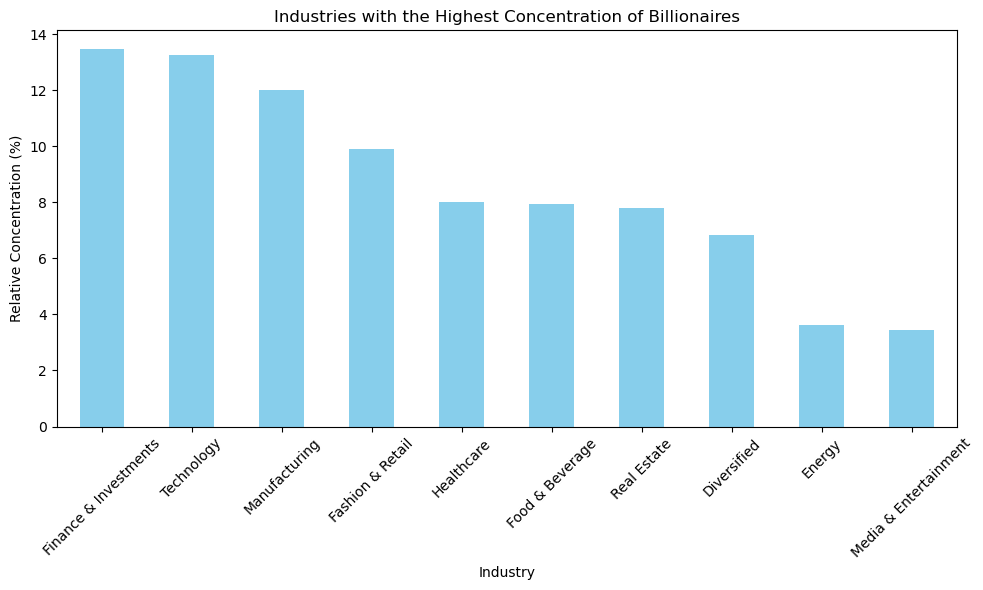

In [78]:
industry_counts = df['Industry'].value_counts()

# Calculate the relative concentration (percentage) of billionaires in each industry
total_billionaires = len(df)
relative_concentration = (industry_counts / total_billionaires) * 100

# Sort the industries based on relative concentration in descending order
sorted_industries = relative_concentration.sort_values(ascending=False)

# Display the industries with the highest concentration
print("Industries with the Highest Concentration of Billionaires:")
print(sorted_industries.head(10)) 

plt.figure(figsize=(10, 6))
sorted_industries.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Relative Concentration (%)')
plt.title('Industries with the Highest Concentration of Billionaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusion**

1. Top 5 Counties having Billionaries are : Unites States , China , India ,Germany and Russia.
2. Top 5 Sources are : real estate , pharmaceuticals , investments , diversified and software.
3. Top 5 Industries are : Finance & Investments , Technology , Manufacturing , Manufacturing and Fashion & Retail.
4. Most of the Billionaries are having age greater than 50.
5. Real Estate is the most common sources of wealth among billionaires.
6. Top Billionaries are Jeff Bezos , Elon Musk , Bernard Arnault & family , Bill Gates and Mark Zuckerberg.
7. Finance & Investments has highest concentration of Billionaries.
8. There is positive correlation between age and networth but no correlation between and & rank and rank & networth.